# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\verus\Downloads\archive (5)\amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [29]:
df.duplicated().sum()

0

# Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [46]:
without_sport_category = df.query("category != 'Sports & Outdoors'")

In [47]:
category_frequency = without_sport_category['category'].value_counts()
category_frequency.head(5)

category
Beauty                                    19312
Handmade Clothing, Shoes & Accessories    19229
Bath & Body                               19092
Birthday Gifts                            18978
Manicure & Pedicure Products              18940
Name: count, dtype: int64

<Axes: xlabel='category'>

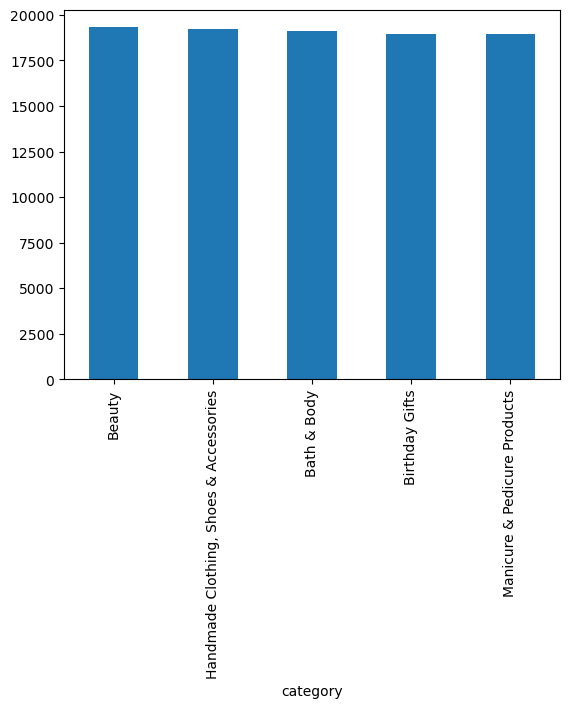

In [48]:
category_frequency.head().plot.bar()

<Axes: ylabel='count'>

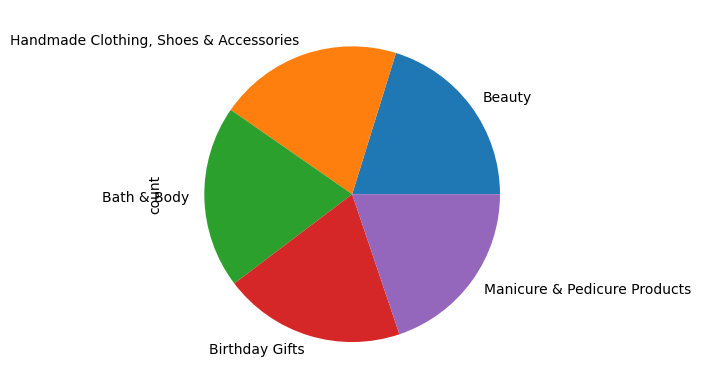

In [50]:
category_frequency_T5 = category_frequency.head(5)
category_frequency_T5.plot.pie()

# Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [39]:
df['price']

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2443651, dtype: float64

In [38]:
df['price'].mean(),df['price'].median(),df['price'].mode()

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

In [51]:
print(f"variance {df['price'].var()},standard deviation {df['price'].std()},range{df['price'].max()-df['price'].min()},IQR {df['price'].quantile(0.75)-df['price'].quantile(0.25)}""")

variance 119445.48532256528,standard deviation 345.60886175352226,range100000.0,IQR 36.0


<Axes: >

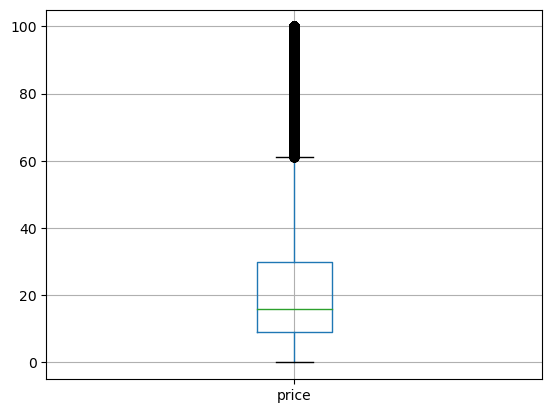

In [52]:
df.query('price<100').boxplot(column='price')

array([[<Axes: title={'center': 'price'}>]], dtype=object)

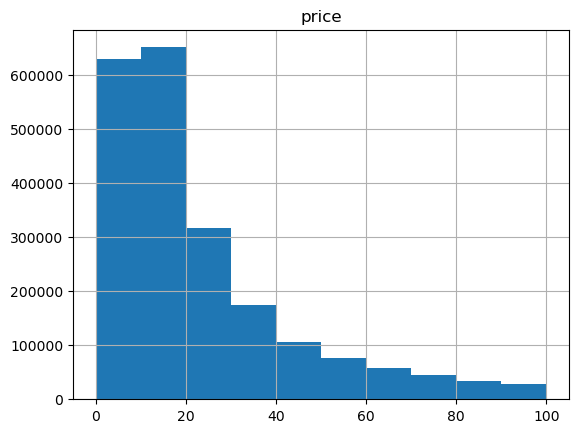

In [57]:
df.query('price<100').hist('price')

TypeError: cut() missing 1 required positional argument: 'bins'

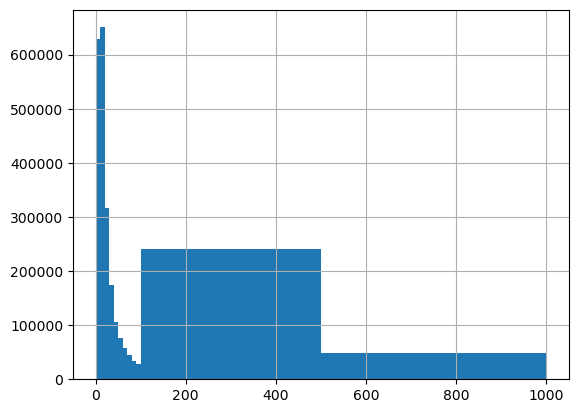

In [61]:
pd.cut(df['price'].hist(bins=[0,10,20,30,40,50,60,70,80,90,100,500,1000]))

In [63]:
ut_price = pd.DataFrame(pd.cut(df['price'],bins=[0,10,20,30,40,50,60,70,80,90,100,500,1000,10000,1000000]).value_counts().sort_index()).reset_index()

<Axes: >

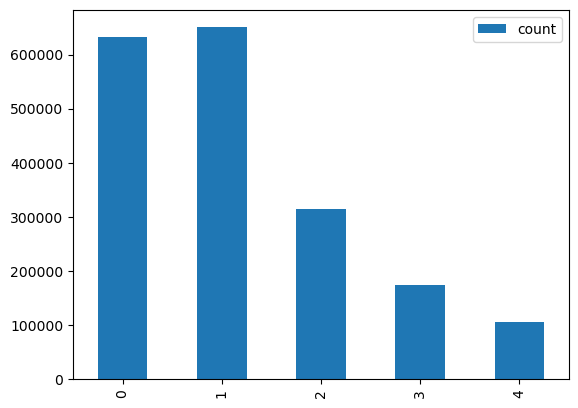

In [64]:
ut_price.head().plot.bar()

# Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 



In [65]:
df['stars']

0          4.7
1          4.7
2          4.7
3          4.7
4          4.6
          ... 
2443646    0.0
2443647    0.0
2443648    0.0
2443649    4.3
2443650    4.5
Name: stars, Length: 2443651, dtype: float64

In [80]:
no_reviews['stars'].value_counts().head()

stars
4.5    151577
4.6    136995
4.4    136165
5.0    128492
4.3    112564
Name: count, dtype: int64

In [73]:
no_reviews = df.query('reviews != 0')

In [75]:
no_reviews['stars'].mean(),no_reviews['stars'].median(),no_reviews['stars'].mode()[0]

(4.31916076222691, 4.4, 4.5)

In [78]:
print(f"variance {no_reviews['stars'].var()}, standard deviation {no_reviews['stars'].std()},range{no_reviews['stars'].max()-no_reviews['stars'].min()},IQR {no_reviews['stars'].quantile(0.75)-no_reviews['stars'].quantile(0.25)}""")

variance 0.3083433752380519, standard deviation 0.5552867504614637,range4.0,IQR 0.5


In [81]:
print(f"Skewness {no_reviews['stars'].skew()}, kurtosis {no_reviews['stars'].kurtosis()}")

Skewness -2.3795681122127945, kurtosis 9.78193769066435


In [82]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [90]:
df.query('reviews == 0 and boughtInLastMonth != 0') #many products are bought BUT have not been reviewed

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
11341,12538,B0CHN2F11G,Fitbit by Google Charge 6 Activity Tracker wit...,0.0,0,139.99,False,50,Wearable Technology
13294,14531,B0CHS9N5BX,Honeywell TPFIT 12L Dehumidifier with Digital ...,0.0,0,149.95,False,100,"Heating, Cooling & Air Quality"
13460,14697,B0CJF2M5NB,"Geepas 2000W Convection Heater, Electric Conve...",0.0,0,26.99,False,50,"Heating, Cooling & Air Quality"
13485,14722,B0CG66M18M,"VonHaus Dehumidifier 1100ml – LED Display, 24 ...",0.0,0,39.99,False,100,"Heating, Cooling & Air Quality"
13532,14769,B0CH18P8CW,Munnie Portable Electric Fan Heater with Dual ...,0.0,0,15.99,False,50,"Heating, Cooling & Air Quality"
...,...,...,...,...,...,...,...,...,...
2397879,2768308,B0C3VY51QZ,Kempt Wall Mounted Spice Rack for Inside Cupbo...,0.0,0,11.99,False,50,Kitchen Storage & Organisation
2406251,2777469,B0CFJJ95XJ,PLUXION 5Pack (3/3/6/6/10 FT) iPhone Charger C...,0.0,0,7.99,False,100,Mobile Phones & Communication
2408338,2779656,B0CC5HQFGX,USB C Display Cable PD 240W with Thunderbolt 3...,0.0,0,16.99,False,100,Mobile Phones & Communication
2409322,2780746,B0C6LR21QX,iPhone Charger Cable 2M 2Pack[Apple MFi Certif...,0.0,0,6.99,False,100,Mobile Phones & Communication


<Axes: >

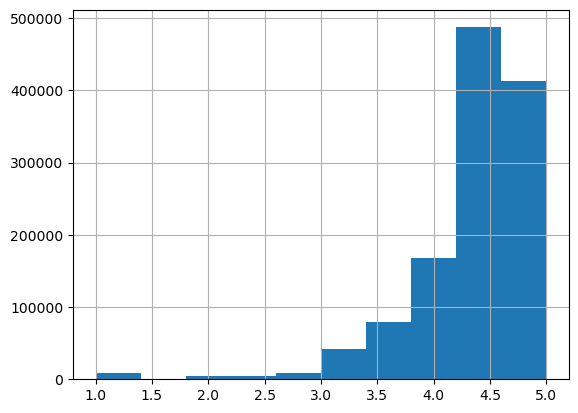

In [91]:
no_reviews['stars'].hist()